<a href="https://colab.research.google.com/github/Michaelzats/Wiki-google-trends/blob/main/Wikipedia_Search_Data_with_Google_Trends_with_Python_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Wikipedia Search Data with Google Trends with Python Comparison

The following tool helps to find the trending keywords/topics for marketing and more. It extracts data from Google Trends and Wikipedia so to show how traffic is distributed and if the keyword/topic worth to invest time on.

Required package

In [ ]:
# !pip3 install pytrends
https://importsem.com/compare-wikipedia-search-data-with-google-trends-with-python/




Required libraries

In [ ]:
import pandas as pd
import requests
import json
from pytrends.request import TrendReq


Withing **keyword** put the keyword/topic below in keywords

In [ ]:
keyword="Ukraine"
url = f'https://en.wikipedia.org/w/api.php?action=query&prop=pageviews&titles={keyword}&format=json'

payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)
getjson = json.loads(response.text)


In [ ]:
df = pd.DataFrame(columns = ['Date', 'Hits'])


In [ ]:
for k,item in getjson['query']['pages'].items():
  for j,value in item['pageviews'].items():
    data = {'Date': j, 'Hits': value}
    df = df.append(data, ignore_index=True)
    


within **pytrends** put the desired langauge (code) and the country (code)

In [ ]:
pytrends = TrendReq(hl='eng-US', tz=360)
kw_list = [keyword]
pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='', gprop='')
df2 = pytrends.interest_over_time()

Graphs -->

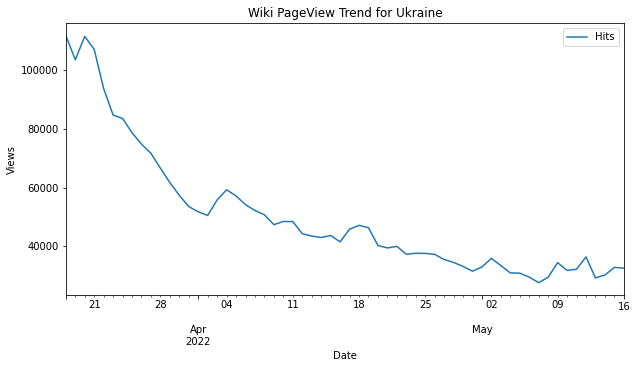

In [ ]:
df['Date'] = pd.to_datetime(df['Date']) 
df.plot.line(x='Date',y='Hits',ylabel='Views',figsize=(10,5),title='Wiki PageView Trend for ' + keyword)


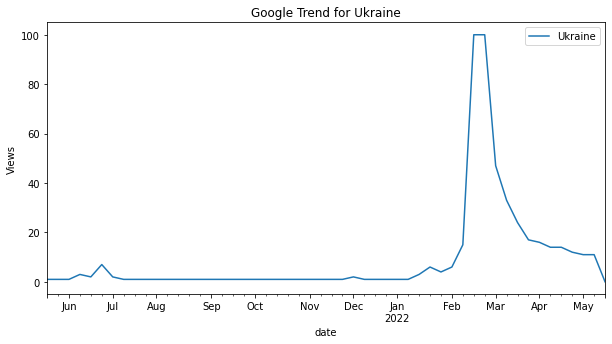

In [ ]:
df2.plot.line(ylabel='Views',figsize=(10,5),title='Google Trend for ' + keyword)

